## car price prediction

UNDRESTANDING VARIABLES OF DATASET

1. ID<br>
Id number of a car<br>
2. Price<br>
Price of a car<br>
3. Levy<br>
Levy is a tax related term. Tax of importing and exporting the cars.<br>
4. Manufacturer<br>
Car Manufacturer who has manufactured the car<br>
5. Model<br>
It is a model name of a car that has been manufactured<br>
6. Prod. year<br>
it represents the year in which that particular car was manufactured<br>
7. Category<br>
It represents the category name of a car<br>
8. Leather interior<br>
It is in binary form in the dataset named Yes or No<br>
Yes - It means that a car has a leather interior<br>
No - It means that a car not having a leather interior<br>
9. Fuel type<br>
There are some fuel types in the dataset that represent what type of fuel a car has.<br>
10. Engine volume<br>
What volume of engine does a car have ?<br>
11. Mileage<br>
What mileage does a car give?<br>
12. Cylinders<br>
It means how many cylinders are in the car.<br>
13. Gear box type<br>
What type of gear box is included in the car.<br>
14. Drive wheels<br>
What kind of drive wheels do cars have.<br>
15. Doors<br>
How many Doors are in the car.<br>
16. Wheel<br>
Which hand-drive a car is having.<br>
17. Color<br>
What kind of color a car has<br>
18. Airbags<br>
How many Airbags are in the car.<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv("car_price_prediction.csv")

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.shape

(19237, 18)

### 1. About the Data

This dataset is taken from Kaggle.com. This dataset is taken because of it's versatile nature of attributes along with size.Below the name of attributes along with the datatype is shown.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

INFORMATION OF THE DATASET

1. There are 19327 entries(Rows) in the dataset.<br>
2. There are 18 variables(columns) in the dataset.<br>
3. There are no null value in any of variables.<br>
4. There are 1 float type variable , 4 Integer type variables and 13 object type variables in the dataset.<br>

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [7]:
df.isna().sum() #to find the missing values of the each column

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [8]:
df['ID'].duplicated().sum()

313

We have 313 duplicates in the data

In [9]:
df['Levy'].value_counts()

-       5819
765      486
891      461
639      410
640      405
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: Levy, Length: 559, dtype: int64

We have unlogic value '-'

In [10]:
df['Mileage'].value_counts()

0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
63083 km       1
28750 km       1
25077 km       1
77452 km       1
186923 km      1
Name: Mileage, Length: 7687, dtype: int64

Mileage column mixed between object and numerical

In [12]:
df['Engine volume'].value_counts()

2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

Engine volume column mixed between object and numerical

In [14]:
df['Doors'].value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

The values must be 2-3, 4-5, >5.

### Data preprocessing

In [15]:
df.drop('ID', axis=1, inplace=True)  #'ID' column will be removed and data frame will be modified

In [16]:
df['Levy']= pd.to_numeric(df['Levy'], errors='coerce') 

Fix Levy column, convert all non numirical values to nan

In [18]:
df['Mileage'] = [float(value.split(' ')[0]) for value in df['Mileage']]

Fix Mileage column, get numerical values only

In [19]:
df['Engine volume'] = [float(value.split(' ')[0]) for value in df['Engine volume']]

Fix Engine volume column, get numerical values only

In [21]:
df['Doors'].replace({'02-Mar': '2-3', '04-May': '4-5'}, inplace=True)

Convert 02-Mar to 2-3, and 04-May to 4-5

### Exploring Data Analysis

<Axes: xlabel='Levy', ylabel='Density'>

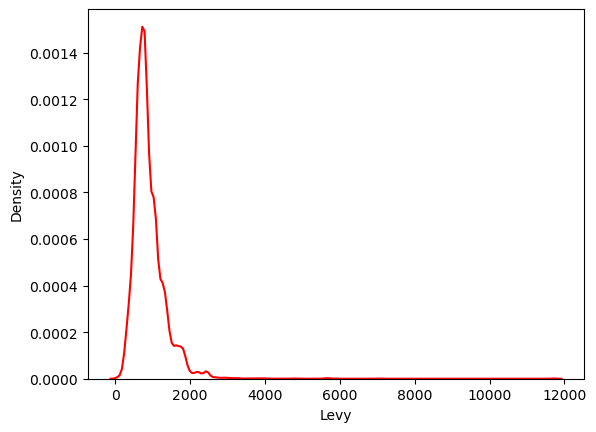

In [22]:
sns.kdeplot(df['Levy'], color='r')

Most values between more than 0 and less than 2000

Text(0.5, 1.0, '# of each Category')

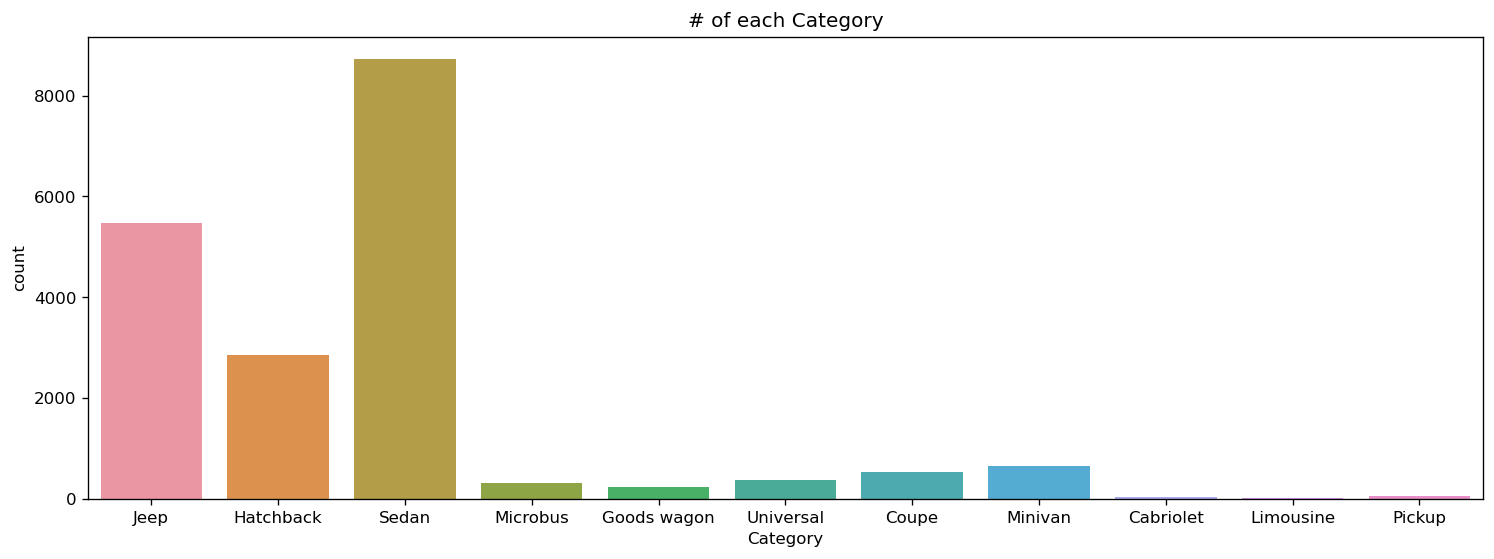

In [23]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= df, x='Category')
plt.title("# of each Category")

Most types of Categories are Sedan, Hatchback, and Jeep.

C:\Users\daniyal ahmed\AppData\Local\Temp\ipykernel_9604\99089866.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Airbags'], color='b', shade=True)


<Axes: xlabel='Airbags', ylabel='Density'>

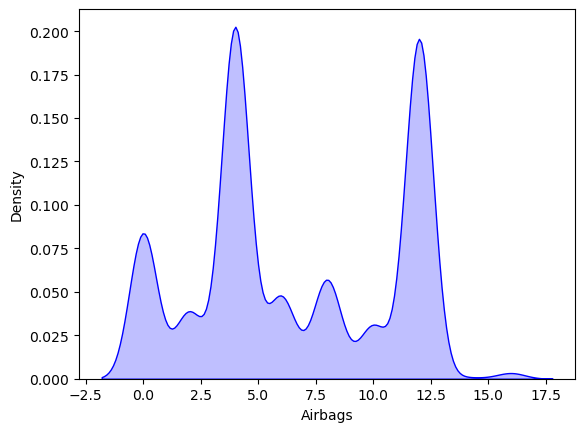

In [25]:
sns.kdeplot(df['Airbags'], color='b', shade=True)

Most cars have 3 to 5 airbags or 13 airbags

C:\Users\daniyal ahmed\AppData\Local\Temp\ipykernel_9604\3228770366.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Mileage'], color='b', shade=True)


<Axes: xlabel='Mileage', ylabel='Density'>

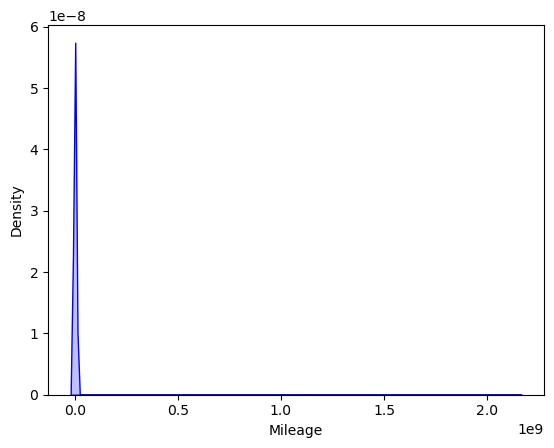

In [26]:
sns.kdeplot(df['Mileage'], color='b', shade=True)

Mileage for most cars are 0.0 (most cars are new)

<Axes: xlabel='Prod. year', ylabel='Count'>

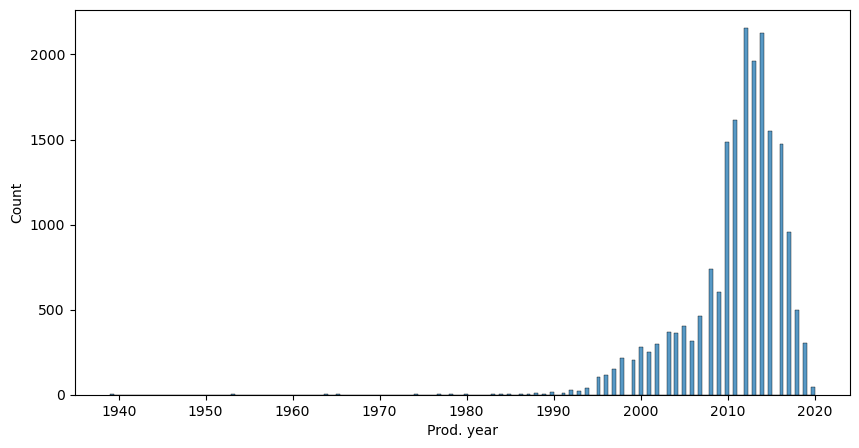

In [27]:
plt.figure(figsize=(10,5), dpi=100)
sns.histplot(df['Prod. year'])

Most cars are between (2010 - 2020), but we have some very old cars

C:\Users\daniyal ahmed\AppData\Local\Temp\ipykernel_9604\4031154114.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Engine volume'], shade = True)


<Axes: xlabel='Engine volume', ylabel='Density'>

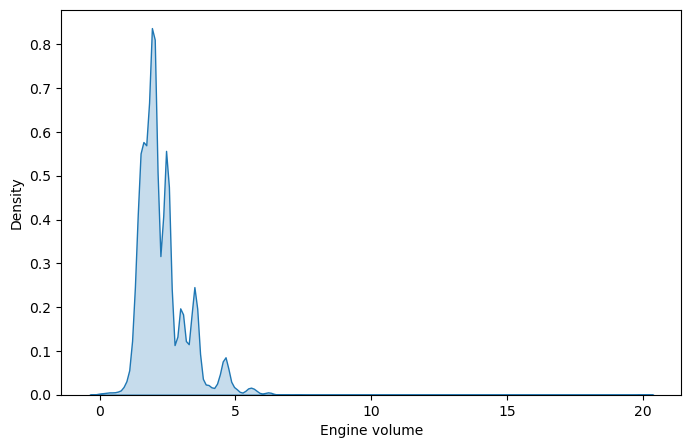

In [28]:
plt.figure(figsize=(8,5), dpi=100)
sns.kdeplot(df['Engine volume'], shade = True)

Most Engine valume in range (1 to 5)

Text(0.5, 1.0, '# of colors')

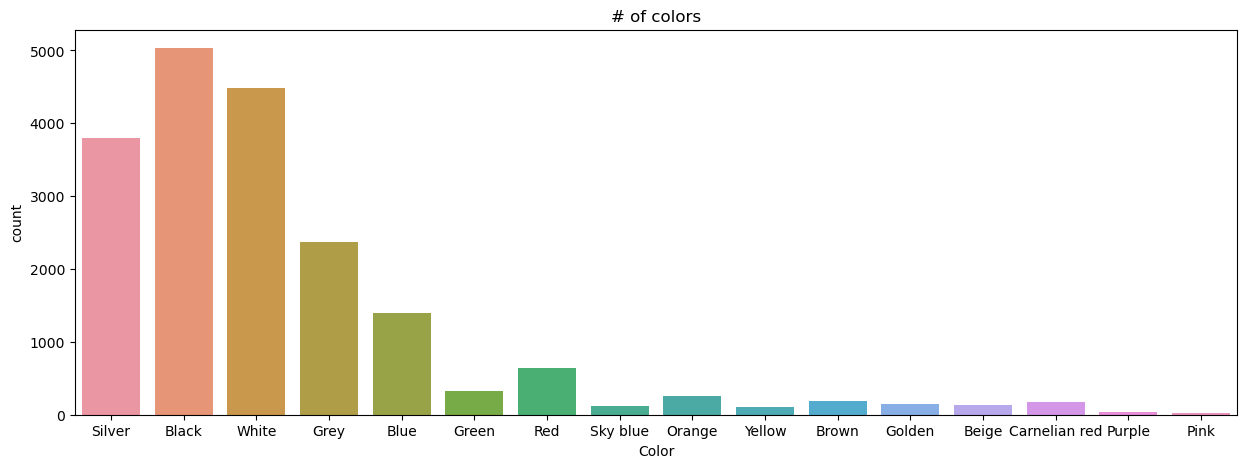

In [29]:
plt.figure(figsize=(15,5), dpi=100)
sns.countplot(data=df, x='Color')
plt.title("# of colors")

<Axes: xlabel='Doors', ylabel='count'>

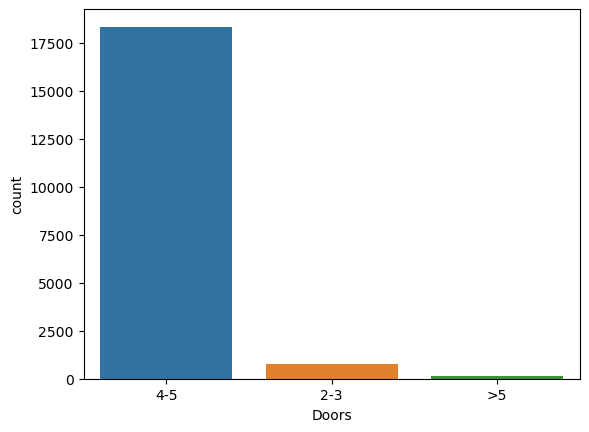

In [30]:
sns.countplot(data=df, x='Doors')

Most cars in the category 3-4

<Axes: xlabel='Price', ylabel='Levy'>

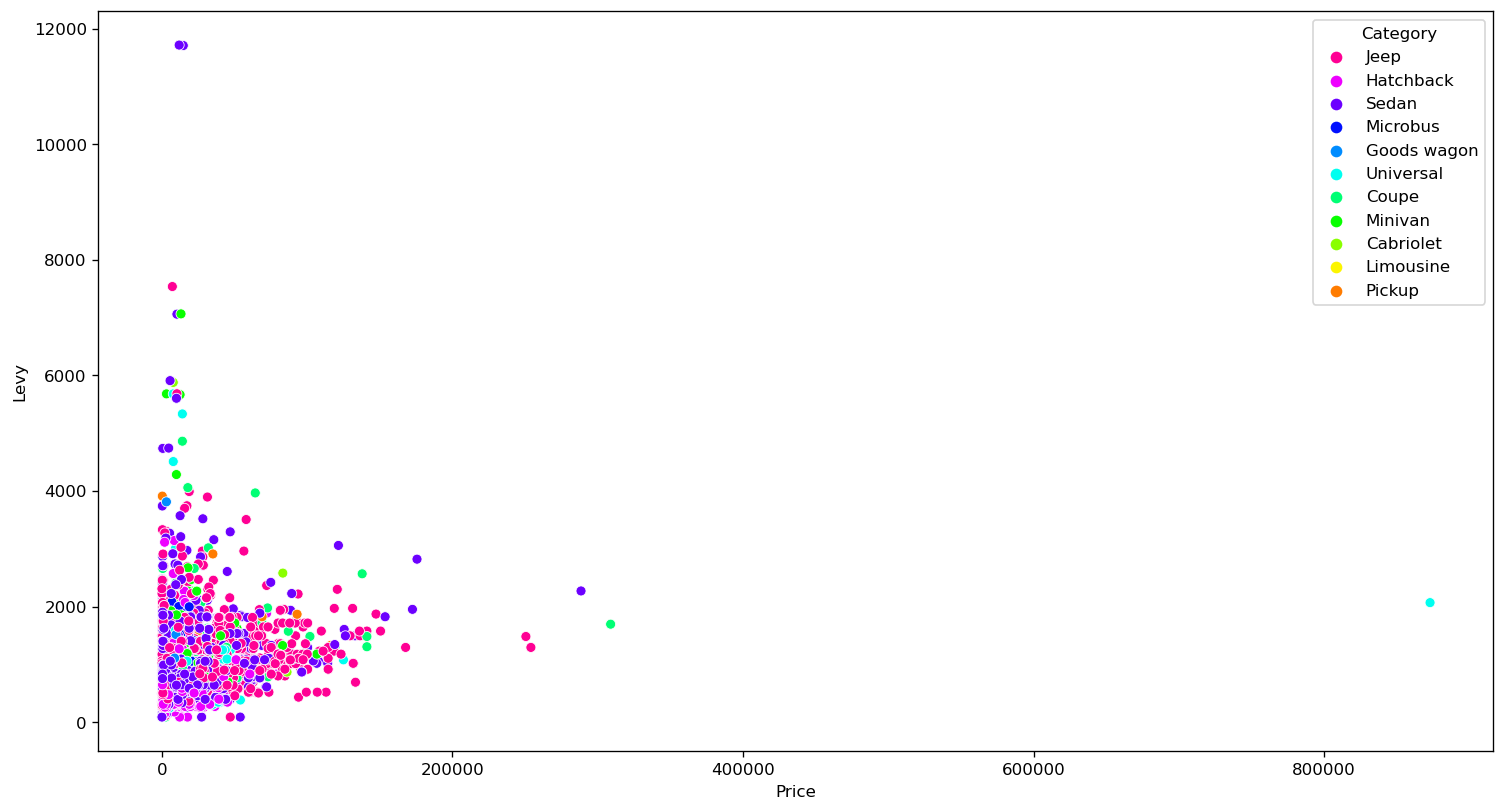

In [32]:
plt.figure(figsize=(15, 8), dpi=120)
sns.scatterplot(data=df, x='Price', y='Levy', hue="Category", palette="hsv_r")

Jeep cars are expensive, while Hatchback and Microbus are not expensive, Universal is not expensive but has a high levy. We can notice there are unlogic plots like high price with low levy and low price with a very high levy that an outliers (we fix it later).

<Axes: xlabel='Price', ylabel='Levy'>

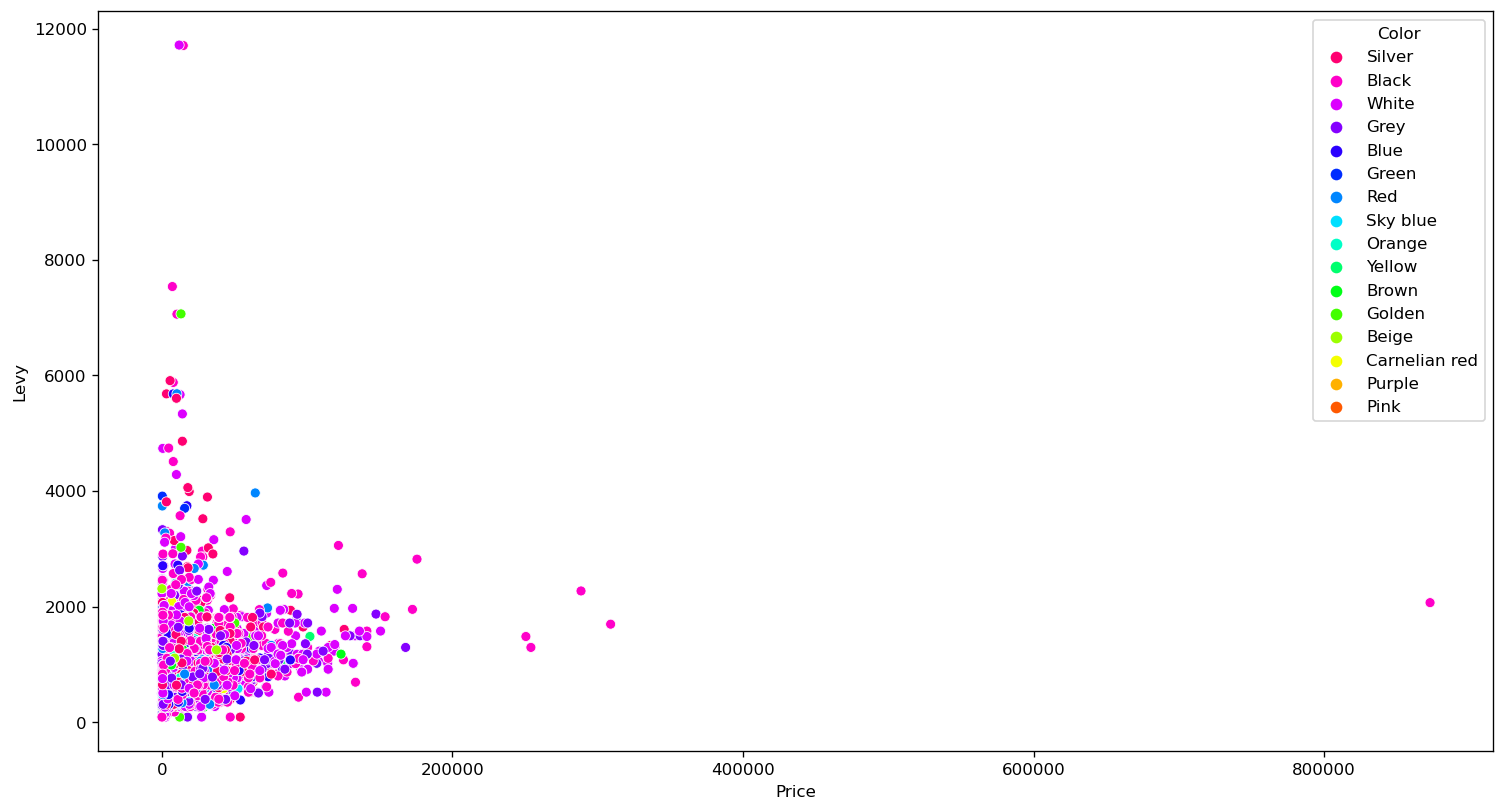

In [33]:
plt.figure(figsize=(15, 8), dpi=120)
sns.scatterplot(data=df, x='Price', y='Levy', hue="Color", palette="hsv_r")

Color doesn't affect on car's price

### Continue data preprocessing

<Axes: >

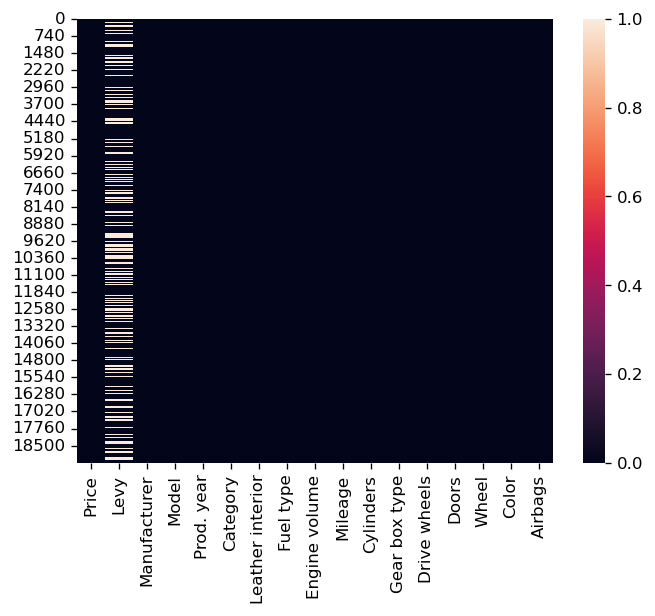

In [35]:
plt.figure(dpi=120)
sns.heatmap(df.isna())

30% of Levy values are NaN

In [36]:
df.drop_duplicates(inplace=True)

Drop dublicates

In [37]:
df = df[df['Price'] > 500]

we have unlogic price values becaouse we have new cars with price less than 500 so we ignored this values

In [39]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,14799.0,2.153406e+04,2.170679e+05,549.0,8500.0,15367.0,24123.0,2.630750e+07
Levy,9461.0,8.763433e+02,4.591725e+02,87.0,640.0,779.0,1017.0,1.171400e+04
Prod. year,14799.0,2.010491e+03,5.954657e+00,1943.0,2008.0,2012.0,2014.0,2.020000e+03
Engine volume,14799.0,2.207203e+00,7.982323e-01,0.0,1.7,2.0,2.5,2.000000e+01
Mileage,14799.0,1.720727e+06,5.148377e+07,0.0,66895.5,120345.0,180000.0,2.147484e+09
Cylinders,14799.0,4.471789e+00,1.127318e+00,1.0,4.0,4.0,4.0,1.600000e+01
Airbags,14799.0,6.448206e+00,3.997651e+00,0.0,4.0,5.0,10.0,1.600000e+01


<Axes: xlabel='Levy', ylabel='Density'>

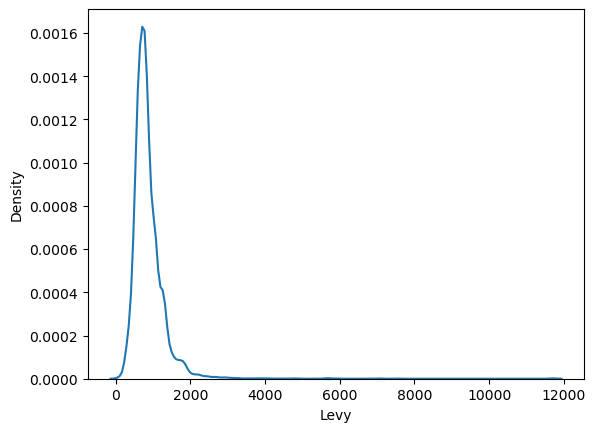

In [41]:
sns.kdeplot(df['Levy'])

In [42]:
df['Levy'].fillna(df['Levy'].median(), inplace=True)

<Axes: xlabel='Levy', ylabel='Density'>

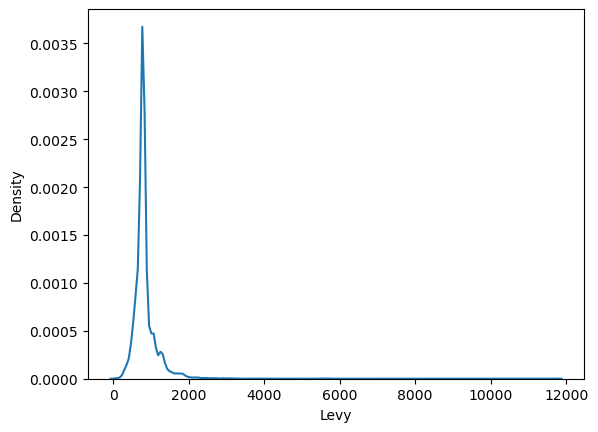

In [43]:
sns.kdeplot(df['Levy'])

We filled missing data by median

In [45]:
# Handling outliers by replace it by lower and upper bounds
def handling_outliers(data, columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        for i in range(df.shape[0]):
            if data[col][i] < lower_bound:
                data[col][i] = lower_bound
            elif data[col][i] > upper_bound:
                data[col][i] = upper_bound
            else:
                continue
    return data

In [46]:
# Get Continus Columns
def get_continus_columns(data):
    obj = list(data.select_dtypes('object').columns)
    lst = list(data.columns)
    for col in obj:
        lst.remove(col)
    return lst

In [47]:
df_with_outliers = df.copy()

In [48]:
df = handling_outliers(df, get_continus_columns(df))

C:\Users\daniyal ahmed\AppData\Local\Temp\ipykernel_9604\1577936865.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = upper_bound
C:\Users\daniyal ahmed\AppData\Local\Temp\ipykernel_9604\1577936865.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = upper_bound
C:\Users\daniyal ahmed\AppData\Local\Temp\ipykernel_9604\1577936865.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = lower_b

Handling outliers

In [49]:
for col in df.select_dtypes('object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

Convert all object columns to numerical by labelencoder (Because ML Model don't understand object columns)

### Build ML Modul

In [51]:
x = df.drop(['Price'], axis=1).values
y = df['Price'].values
x = MinMaxScaler().fit_transform(x)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [60]:
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=8)
dt  = DecisionTreeRegressor(max_depth = 5)
rf  = RandomForestRegressor(n_estimators=100, max_features= 7)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf)]

In [62]:
from sklearn.metrics import r2_score

Linear Regression : 38 %
K Nearest Neighbours : 63 %
Decision Tree : 49 %
Random Forest : 77 %


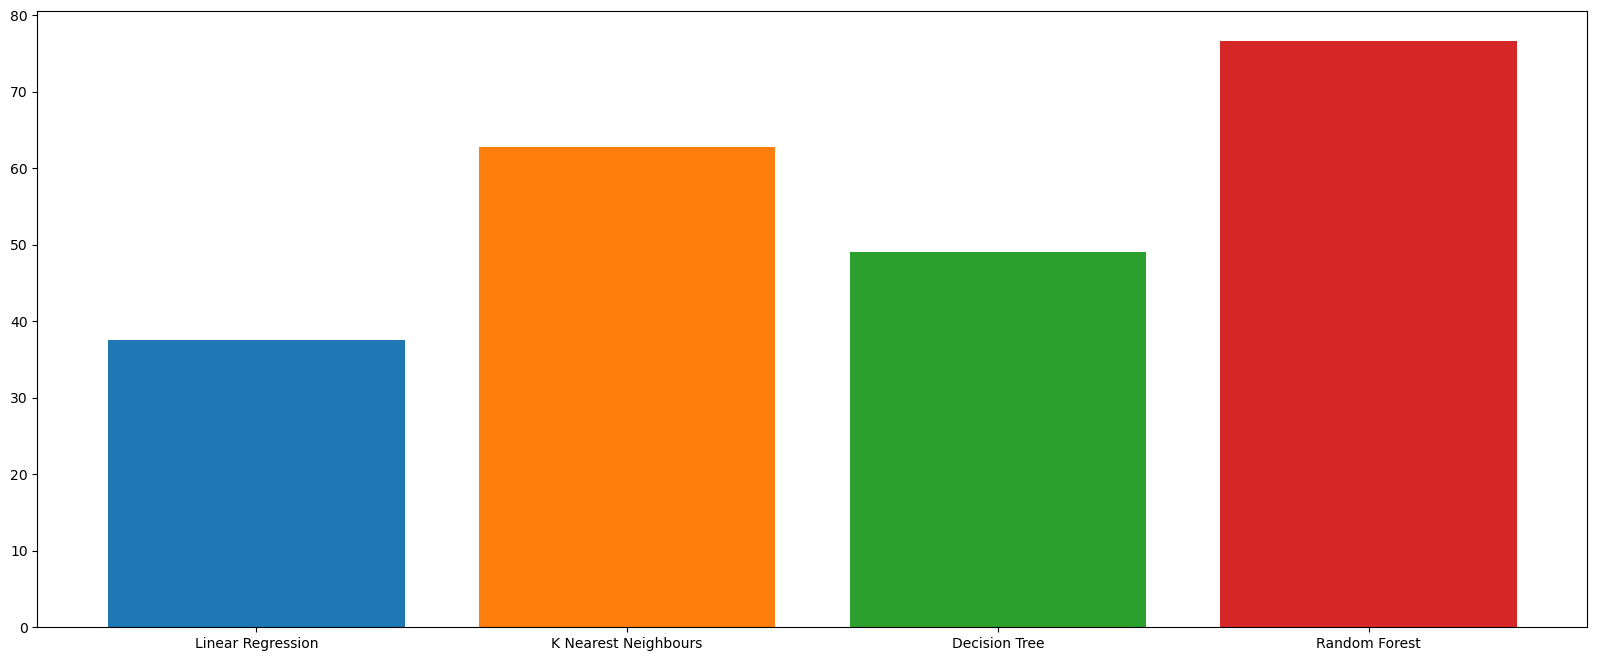

In [64]:
for regressor_name, regressor in regressors:
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    accuracy = round(r2_score(y_test, y_pred), 3) * 100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20, 8)
    plt.bar(regressor_name, accuracy)

plt.show()

The Random Forest model has the best accurecy (77%).